In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nibabel as nb
import seaborn as sns

In [ ]:
data_dir = '/home/julia/data/gradients/

### Plot eigenvalue distribution of main dataset

In [3]:
eigen_vol = pickle.load(open(data_dir+'results/embedding/embed_dict.pkl', 'rb'))

In [4]:
eigen_perc_vol = eigen_vol['lambdas']/np.sum(eigen_vol['lambdas'])

In [5]:
comp09 = np.where(np.cumsum(eigen_perc_vol) > 0.9)[0][0]
comp05 = np.where(np.cumsum(eigen_perc_vol) > 0.5)[0][0]

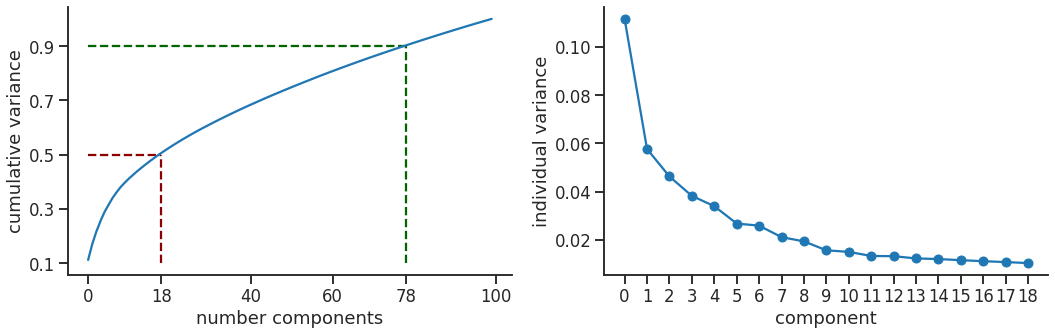

In [6]:
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(figsize=(15,5))

fig.add_subplot(121)
plt.plot(np.cumsum(eigen_perc_vol))
plt.ylabel('cumulative variance')
plt.xlabel('number components')
plt.xticks([0, comp05, 40, 60, comp09, 100])
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.hlines(0.9, 0, comp09, color='darkgreen', linestyle="--")
plt.vlines(comp09, 0.1, 0.9, color='darkgreen', linestyle="--")
plt.hlines(0.5, 0, comp05, color='darkred', linestyle="--")
plt.vlines(comp05, 0.1, 0.5, color='darkred', linestyle="--")


sns.despine()

fig.add_subplot(122)
plt.plot(eigen_perc_vol[:comp05+1], 'o', linestyle="-")
plt.xticks(range(comp05+1))
plt.ylabel('individual variance')
plt.xlabel('component')

sns.despine()
plt.tight_layout()

### Plot first 20 components individual variance for main dataset and three reproduction datasets

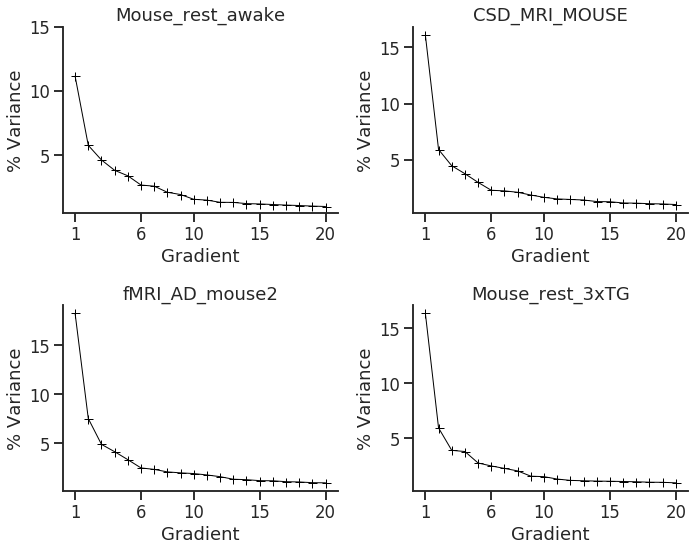

In [3]:
datasets = ['Mouse_rest_awake','CSD_MRI_MOUSE','fMRI_AD_mouse2', 'Mouse_rest_3xTG']
files = [data_dir+'results/embedding/embed_dict.pkl',
         data_dir+'results/repro/csd_embed_dict.pkl',
         data_dir+'results/repro/ad2_embed_dict.pkl',
         data_dir+'results/repro/ad3_embed_dict.pkl'
        ]

sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(figsize=(10,8))
for d in range(4):
    eigen_vol = pickle.load(open(files[d] , 'rb'))
    eigen_perc_vol = eigen_vol['lambdas']/np.sum(eigen_vol['lambdas'])
    fig.add_subplot(2,2,d+1)
    plt.title(datasets[d])
    plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],eigen_perc_vol[:20]*100, '+', 
         linestyle="-", linewidth=1, color='black')
    plt.xticks([1,6,10,15,20])
    plt.yticks([5, 10, 15])
    plt.ylabel('% Variance')
    plt.xlabel('Gradient')
sns.despine()
plt.tight_layout()
fig.savefig(data_dir+'pics/variance.svg')

### Plot first 6 components in Allen space

In [22]:
template = nb.load(data_dir+'allen_atlas/template_200um.nii.gz').get_data()
mask = nb.load(data_dir+'allen_atlas/cortex_mask_tight_200um.nii.gz').get_data()

In [23]:
x=30
y=12
z=20

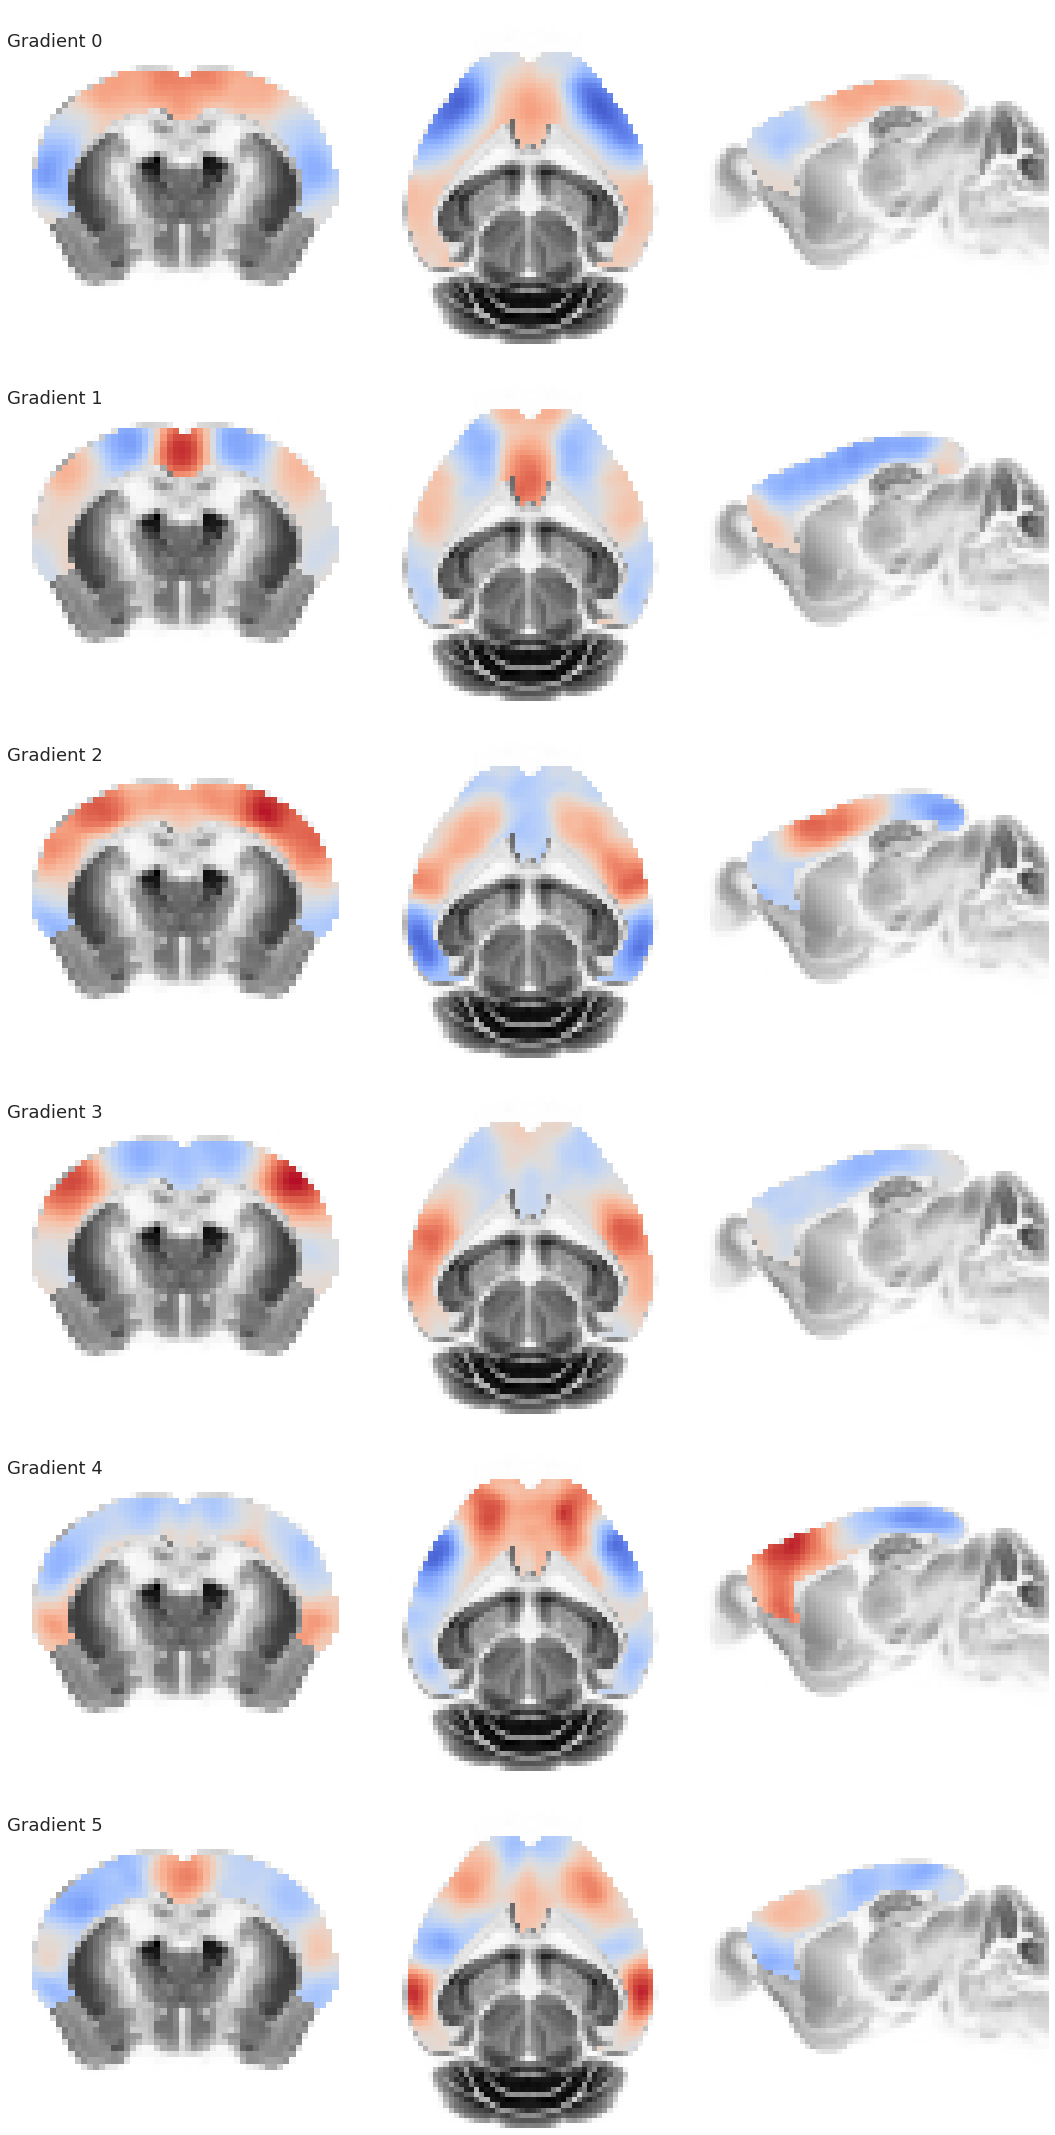

In [31]:
gradients = nb.load(data_dir+'results/embedding/embed.nii.gz').get_data()
fig = plt.figure(figsize=(15,30))
for g in range(6):
    
    gradient = gradients[:,:,:,g]
    gradient[mask==0] = np.nan
    vmax = np.max([np.abs(np.nanmin(gradient)), np.abs(np.nanmax(gradient))])
    vmin = -vmax
    
    template_img = [template[x,:,:], template[:,y,:], template[:,:,z].T]
    gradient_img = [gradient[x,:,:], gradient[:,y,:], gradient[:,:,z].T]
    
    for i in range(3):
        
        fig.add_subplot(6,3,(g*3+(i+1)))
        plt.imshow(template_img[i],  cmap='Greys', aspect='equal');
        plt.imshow(gradient_img[i],  cmap="coolwarm", aspect='equal', vmin=vmin, vmax=vmax);
        if i == 0:
            plt.title('Gradient %s' %g, loc='left')
        plt.axis('off');

plt.tight_layout()

In [13]:
fig.savefig(data_dir+'pics/gradient_0to5.png')